In [1]:
%matplotlib inline
import pybaseball as pb
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Get team data from 1900 to 2017. 

The `ind` argument asks if we want data at the **ind**ividual level. 

`ind=1` means we get each season for each team, whereas `ind=0` means we get each team aggregated over all seasons.

In [2]:
pitching_data = pb.team_pitching(1900, 2015)

pitching_data.head(5)

,Season,Team,W,L,SV,G,GS,IP,SO,K/9,BB/9,HR/9,BABIP,LOB%,GB%,HR/FB,ERA,FIP,xFIP,WAR
1,1907.0,Cubs,107.0,44.0,8.0,200.0,155.0,1373.1,586.0,3.84,2.63,0.07,0.241,0.747,NaN,NaN,1.73,2.31,NaN,17.8
2,1909.0,Cubs,104.0,49.0,11.0,212.0,155.0,1409.1,680.0,4.34,2.32,0.04,0.248,0.745,NaN,NaN,1.74,2.08,NaN,22.4
3,1906.0,Cubs,115.0,36.0,10.0,187.0,154.0,1388.1,702.0,4.55,2.89,0.08,0.238,0.757,NaN,NaN,1.75,2.43,NaN,17.6
4,1910.0,Athletics,102.0,48.0,5.0,200.0,155.0,1421.2,789.0,4.99,2.85,0.05,0.254,0.731,NaN,NaN,1.79,2.23,NaN,16.4
5,1909.0,Athletics,95.0,58.0,3.0,214.0,153.0,1378.0,728.0,4.75,2.52,0.06,0.251,0.737,NaN,NaN,1.93,2.08,NaN,15.1


In [3]:
list(pitching_data)

['Season',
 'Team',
 'W',
 'L',
 'SV',
 'G',
 'GS',
 'IP',
 'SO',
 'K/9',
 'BB/9',
 'HR/9',
 'BABIP',
 'LOB%',
 'GB%',
 'HR/FB',
 'ERA',
 'FIP',
 'xFIP',
 'WAR']

In [4]:
pitching_data = pitching_data[['Season', 'Team', 'W', 'L']]

pitching_data['GP'] = pitching_data['W'] + pitching_data['L']

pitching_data.head()

,Season,Team,W,L,GP
1,1907.0,Cubs,107.0,44.0,151.0
2,1909.0,Cubs,104.0,49.0,153.0
3,1906.0,Cubs,115.0,36.0,151.0
4,1910.0,Athletics,102.0,48.0,150.0
5,1909.0,Athletics,95.0,58.0,153.0


In [5]:
pitching_data.drop(pitching_data[['W', 'L']], axis=1, inplace=True)

pitching_data.head()

,Season,Team,GP
1,1907.0,Cubs,151.0
2,1909.0,Cubs,153.0
3,1906.0,Cubs,151.0
4,1910.0,Athletics,150.0
5,1909.0,Athletics,153.0


In [6]:
batting_data = pb.team_batting(1900, 2015)

batting_data.head()

,Season,Team,G,PA,HR,R,RBI,SB,BB%,K%,...,BABIP,AVG,OBP,SLG,wOBA,wRC+,BsR,Off,Def,WAR
1,1927.0,Yankees,1725.0,6222.0,158.0,976.0,908.0,90.0,0.103,0.098,...,0.324,0.307,0.384,0.488,0.400,126.0,-14.2,203.7,76.2,49.3
2,1976.0,Reds,2135.0,6538.0,141.0,857.0,802.0,210.0,0.104,0.138,...,0.309,0.280,0.357,0.424,0.357,120.0,19.0,166.6,39.2,45.9
3,1931.0,Yankees,1751.0,6473.0,155.0,1067.0,990.0,139.0,0.116,0.086,...,0.309,0.297,0.383,0.457,0.387,124.0,-3.4,206.4,18.8,45.0
4,1939.0,Yankees,1550.0,6129.0,166.0,967.0,904.0,72.0,0.114,0.089,...,0.295,0.287,0.374,0.451,0.380,113.0,-4.6,104.6,129.7,44.7
5,1969.0,Orioles,1981.0,6328.0,175.0,779.0,722.0,82.0,0.100,0.127,...,0.281,0.265,0.343,0.414,0.341,112.0,1.7,86.9,150.9,44.6


In [7]:
list(batting_data)

['Season',
 'Team',
 'G',
 'PA',
 'HR',
 'R',
 'RBI',
 'SB',
 'BB%',
 'K%',
 'ISO',
 'BABIP',
 'AVG',
 'OBP',
 'SLG',
 'wOBA',
 'wRC+',
 'BsR',
 'Off',
 'Def',
 'WAR']

In [8]:
batting_data = batting_data[['Season', 'Team', 'R', 'HR']]

In [9]:
data = pd.merge(pitching_data, batting_data)

data.head()

,Season,Team,GP,R,HR
0,1907.0,Cubs,151.0,571.0,13.0
1,1909.0,Cubs,153.0,632.0,20.0
2,1906.0,Cubs,151.0,704.0,20.0
3,1910.0,Athletics,150.0,670.0,19.0
4,1909.0,Athletics,153.0,601.0,21.0


In [10]:
data['R/GP'] = data['R'] / data['GP']

data['HR/GP'] = data['HR'] / data['GP']

data.head()

,Season,Team,GP,R,HR,R/GP,HR/GP
0,1907.0,Cubs,151.0,571.0,13.0,3.781457,0.086093
1,1909.0,Cubs,153.0,632.0,20.0,4.130719,0.130719
2,1906.0,Cubs,151.0,704.0,20.0,4.662252,0.132450
3,1910.0,Athletics,150.0,670.0,19.0,4.466667,0.126667
4,1909.0,Athletics,153.0,601.0,21.0,3.928105,0.137255


In [11]:
seasons_team = data['Season'].tolist()
avg_runs_per_game_team = data['R/GP'].tolist()
avg_home_runs_per_game_team = data['HR/GP'].tolist()

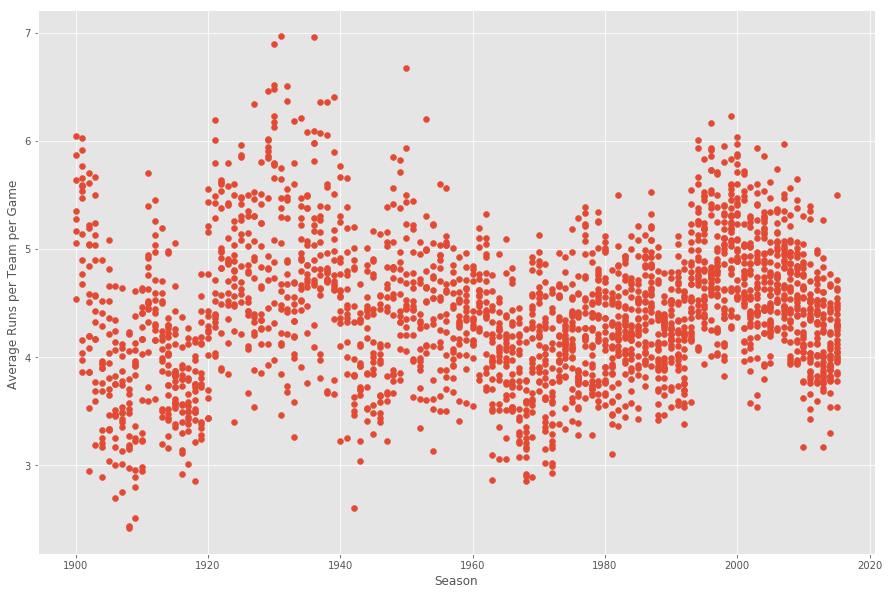

In [12]:
plt.figure(figsize=(15,10))
plt.scatter(seasons_team, avg_runs_per_game_team)
plt.xlabel('Season')
plt.ylabel('Average Runs per Team per Game ')
plt.show()

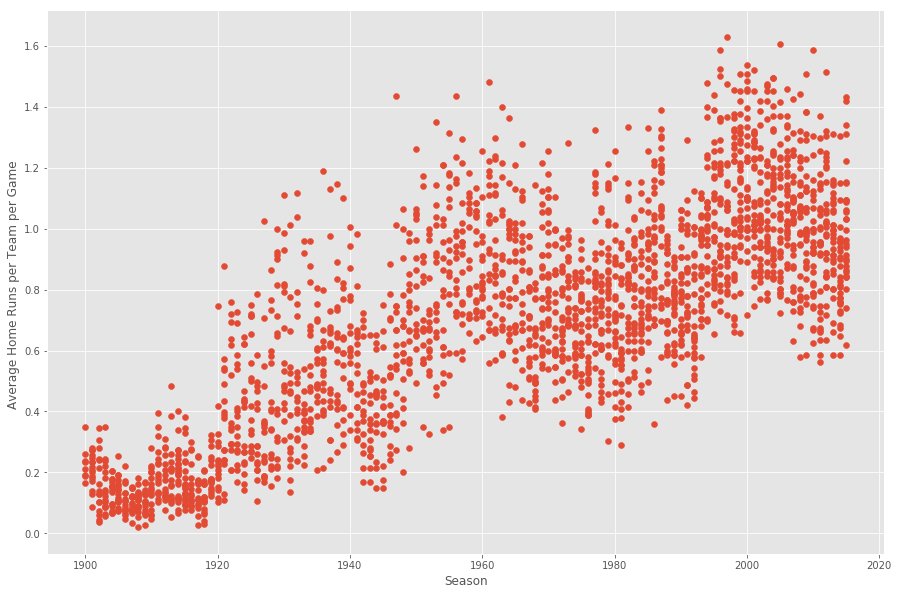

In [13]:
plt.figure(figsize=(15,10))
plt.scatter(seasons_team, avg_home_runs_per_game_team)
plt.xlabel('Season')
plt.ylabel('Average Home Runs per Team per Game ')
plt.show()

In [14]:
data = data.groupby(['Season']).sum()

data.head()

,GP,R,HR,R/GP,HR/GP
Season,,,,,
1900.0,1106.0,5932.0,254.0,42.937525,1.836398
1901.0,2188.0,11073.0,455.0,81.052207,3.327468
1902.0,2182.0,9879.0,356.0,72.431327,2.610719
1903.0,2198.0,9888.0,335.0,71.929442,2.433599
1904.0,2438.0,9302.0,331.0,61.038886,2.173150


In [15]:
data['R/GP'] = data['R'] / data['GP']

data['HR/GP'] = data['HR'] / data['GP']

data.head()

,GP,R,HR,R/GP,HR/GP
Season,,,,,
1900.0,1106.0,5932.0,254.0,5.363472,0.229656
1901.0,2188.0,11073.0,455.0,5.060786,0.207952
1902.0,2182.0,9879.0,356.0,4.527498,0.163153
1903.0,2198.0,9888.0,335.0,4.498635,0.152411
1904.0,2438.0,9302.0,331.0,3.815422,0.135767


In [16]:
data.reset_index(level=0, inplace=True)

data.head()

,Season,GP,R,HR,R/GP,HR/GP
0,1900.0,1106.0,5932.0,254.0,5.363472,0.229656
1,1901.0,2188.0,11073.0,455.0,5.060786,0.207952
2,1902.0,2182.0,9879.0,356.0,4.527498,0.163153
3,1903.0,2198.0,9888.0,335.0,4.498635,0.152411
4,1904.0,2438.0,9302.0,331.0,3.815422,0.135767


In [17]:
seasons_all = data['Season'].tolist()
avg_runs_per_game_all = data['R/GP'].tolist()
avg_home_runs_per_game_all = data['HR/GP'].tolist()

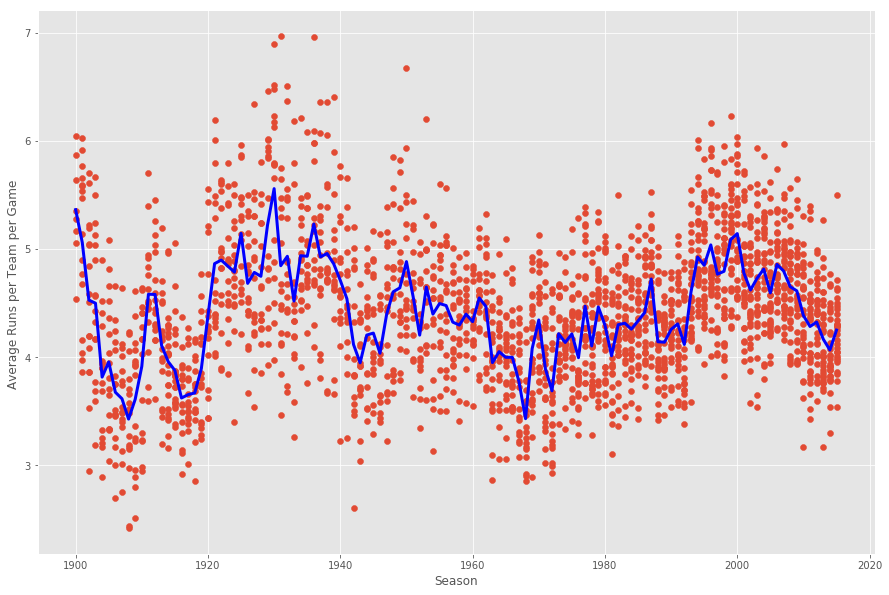

In [18]:
plt.figure(figsize=(15,10))
plt.scatter(seasons_team, avg_runs_per_game_team)
plt.plot(seasons_all, avg_runs_per_game_all, 'b', linewidth=3)
plt.xlabel('Season')
plt.ylabel('Average Runs per Team per Game ')
plt.show()

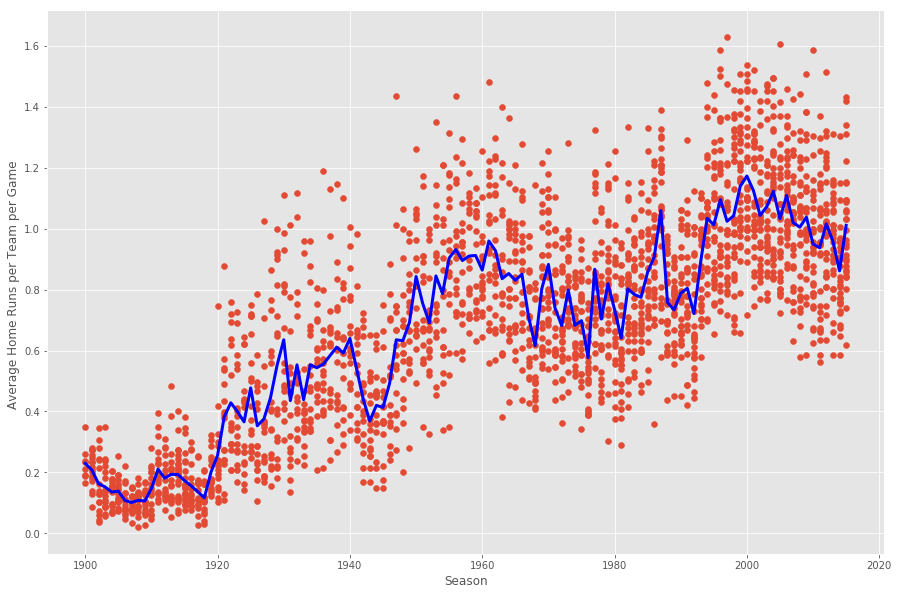

In [19]:
plt.figure(figsize=(15,10))
plt.scatter(seasons_team, avg_home_runs_per_game_team)
plt.plot(seasons_all, avg_home_runs_per_game_all, 'b', linewidth=3)
plt.xlabel('Season')
plt.ylabel('Average Home Runs per Team per Game ')
plt.show()